# TW5


## A simple classification task with Naive Bayes classifier & ROC curve

Xiaomei Xie

Lili Hao

## Part 0:

Read and run each cell of the example. 

### Setup

In [1249]:
%matplotlib notebook
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import seaborn as sn
import os

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."

CHAPTER_ID = 'Naive Bayesian'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### 1. Sythetic Datasets

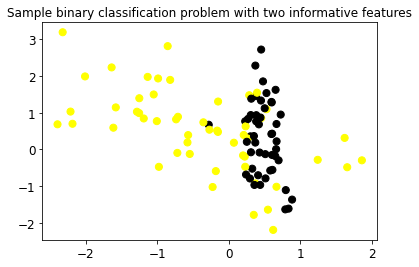

In [1250]:
# synthetic dataset for classification (binary)

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

plt.figure()
plt.title('Sample binary classification problem with two informative features')

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker= 'o', c=y, s=50, cmap=cmap_bold)
plt.show()

## Naive Bayes classifiers

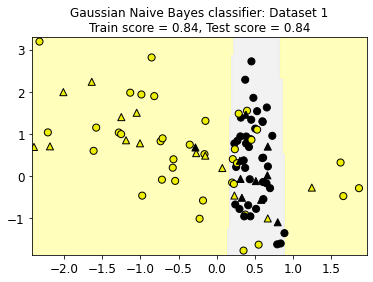

In [1251]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)

plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 1')

In [1252]:
nbclf.score(X_test, y_test)

0.84

In [1253]:
y_pred = nbclf.predict(X_test)

# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

[[12  3]
 [ 1  9]]


In [1254]:
# Print classification report
target_names = ['Class 0', 'Class 1']

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

              precision    recall  f1-score   support

     Class 0       0.92      0.80      0.86        15
     Class 1       0.75      0.90      0.82        10

    accuracy                           0.84        25
   macro avg       0.84      0.85      0.84        25
weighted avg       0.85      0.84      0.84        25



## ROC Curve

Accuracy =  0.8600000000000001


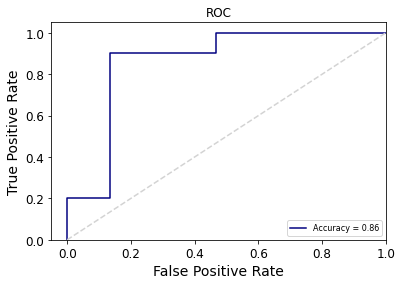

In [1255]:
from sklearn.metrics import roc_curve, auc
y_score = nbclf.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1])

roc_auc = auc(false_positive_rate, true_positive_rate)
print('Accuracy = ', roc_auc)

count = 1

# Get different color each graph line
colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
            'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
            'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
            'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
color = colorSet[count-1]

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, c=color, label=('Accuracy = %0.2f'%roc_auc))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 2. Application to a real-world dataset¶

- Breast Canver dataset


In [1256]:
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

print(X_cancer)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [1257]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_cancer, y_cancer, random_state = 0)

nbclf = GaussianNB().fit(X_train2, y_train2)

print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train2, y_train2)))

print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test2, y_test2)))

Breast cancer dataset
Accuracy of GaussianNB classifier on training set: 0.95
Accuracy of GaussianNB classifier on test set: 0.94


### accuracy in training dataset

In [1258]:
y_pred2 = nbclf.predict(X_train2)


target_names = list(cancer.target_names)
# plot a confusion matrix
confusion_mat = confusion_matrix(y_train2, y_pred2)

print(confusion_mat)

# Print classification report


result_metrics = classification_report(y_train2, y_pred2, target_names=target_names)

print(result_metrics)

[[142  17]
 [  4 263]]
              precision    recall  f1-score   support

   malignant       0.97      0.89      0.93       159
      benign       0.94      0.99      0.96       267

    accuracy                           0.95       426
   macro avg       0.96      0.94      0.95       426
weighted avg       0.95      0.95      0.95       426



### accuracy in testing dataset

In [1259]:
y_pred2 = nbclf.predict(X_test2)


target_names = list(cancer.target_names)

# plot a confusion matrix
print(confusion_mat)

# Print classification report
result_metrics = classification_report(y_test2, y_pred2, target_names=target_names)

print(result_metrics)

[[142  17]
 [  4 263]]
              precision    recall  f1-score   support

   malignant       0.92      0.91      0.91        53
      benign       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [1260]:
y_score2 = nbclf.predict_proba(X_test2) 

In [1261]:
print(y_score2.shape)

(143, 2)


In [1262]:
 y_score2[:,1]

array([1.66114173e-006, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 4.46064296e-007, 9.99999988e-001,
       1.00000000e+000, 6.39182809e-004, 6.28226453e-002, 2.51766439e-014,
       9.41283356e-001, 7.46964953e-057, 1.31238633e-040, 2.31097572e-121,
       1.06247517e-012, 3.58558008e-014, 9.99999999e-001, 1.00000000e+000,
       8.87213589e-045, 1.00000000e+000, 1.00000000e+000, 2.57966976e-018,
       1.00000000e+000, 9.94926498e-062, 1.00000000e+000, 3.27379161e-055,
       9.99999210e-001, 2.79390332e-011, 1.00000000e+000, 4.35444449e-004,
       1.00000000e+000, 6.21887259e-042, 1.00000000e+000, 1.08247773e-014,
       9.79467574e-001, 1.00000000e+000, 4.16194621e-003, 1.00000000e+000,
       5.60678994e-002, 3.59594013e-147, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 3.52803449e-018, 1.29947447e-099, 8.65966562e-009,
       1.62287648e-035, 1

### ROC Curve

Accuracy =  0.990146750524109


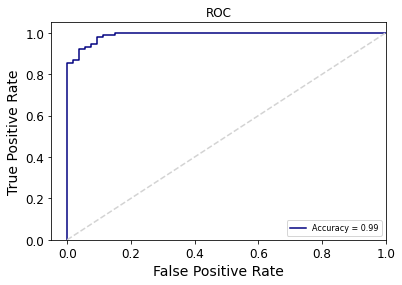

In [1263]:
from sklearn.metrics import roc_curve, auc
y_score2 = nbclf.predict_proba(X_test2)

false_positive_rate2, true_positive_rate2, thresholds = roc_curve(y_test2, y_score2[:,1])

roc_auc2 = auc(false_positive_rate2, true_positive_rate2)
print('Accuracy = ', roc_auc2)

count = 1

# Get different color each graph line
colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
            'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
            'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
            'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
color = colorSet[count-1]

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate2, true_positive_rate2, c=color, label=('Accuracy = %0.2f'%roc_auc2))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## TW5 Tasks

## Part 1

- Dataset: iris.csv is stored in a folder data

- Your modeling analysis should be done on two different datasets, (1) the original dataset and (b) Normalized data using min-max normalization. 

- Apply (1) Naive Bayes classifiers 

- A framework of k-cross validation (k = 10)

- Display confusion matrix (a matrix with numbers)

- Print a summary of performance metrics

- Plot ROC curves



### Submissions

- Upload your notebook on GitHub repo and provide an URL to the file.

- Write a summary of the analysis and submit it to Canvas. Your summary should include the comparisons of the two models and the model peformance based on parameters (e.g., k value in k-NN classifier).


In [1264]:
# Where to save the figures
PROJECT_ROOT_DIR = "."

CHAPTER_ID = 'iris.csv'
IRIS_PATH = os.path.join(PROJECT_ROOT_DIR, "data", CHAPTER_ID)
print(IRIS_PATH)
df = pd.read_csv(IRIS_PATH)
print(df.head)

.\data\iris.csv
<bound method NDFrame.head of      SepalLength  SepalWidth  PetalLength  PetalWidth            Name  Class
0            5.1         3.5          1.4         0.2     Iris-setosa      0
1            4.9         3.0          1.4         0.2     Iris-setosa      0
2            4.7         3.2          1.3         0.2     Iris-setosa      0
3            4.6         3.1          1.5         0.2     Iris-setosa      0
4            5.0         3.6          1.4         0.2     Iris-setosa      0
..           ...         ...          ...         ...             ...    ...
145          6.7         3.0          5.2         2.3  Iris-virginica      2
146          6.3         2.5          5.0         1.9  Iris-virginica      2
147          6.5         3.0          5.2         2.0  Iris-virginica      2
148          6.2         3.4          5.4         2.3  Iris-virginica      2
149          5.9         3.0          5.1         1.8  Iris-virginica      2

[150 rows x 6 columns]>


In [1265]:
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name',
       'Class'],
      dtype='object')

In [1266]:
df.head(2)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0


In [1267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
 5   Class        150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [1268]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [1325]:
df.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
Class          0
zero           0
one            0
two            0
dtype: int64

<AxesSubplot:>

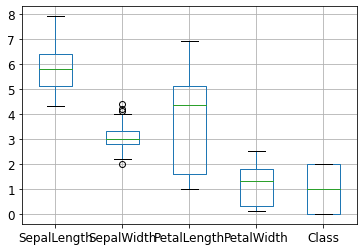

In [1269]:
df.boxplot()

In [1270]:
col = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

### Your modeling analysis should be done on two different datasets, (1) the original dataset and (b) Normalized data using min-max normalization. 

In [1271]:
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing

In [1272]:
min_max = preprocessing.MinMaxScaler()
scaled_df = min_max.fit_transform(df[col].values)
normal_df = pd.DataFrame(scaled_df, columns=col)

In [1273]:
normal_df.head(2)

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667


In [1274]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [1275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
 5   Class        150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Apply (1) Naive Bayes classifiers 

In [1276]:
X = df.iloc[:, : 4].to_numpy() 
print(X.shape)

(150, 4)


In [1277]:
X = df.iloc[:, : 4].to_numpy() 

y = df['Class'].to_numpy() 

from sklearn.model_selection import train_test_split  

from sklearn.naive_bayes import GaussianNB 

from adspy_shared_utilities import plot_class_regions_for_classifier 

  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  

nbclf = GaussianNB().fit(X_train, y_train) 


In [1278]:
print(nbclf.score(X_test, y_test))

1.0


In [1279]:
y_pred = nbclf.predict(X_test)

# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


In [1280]:
print(y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


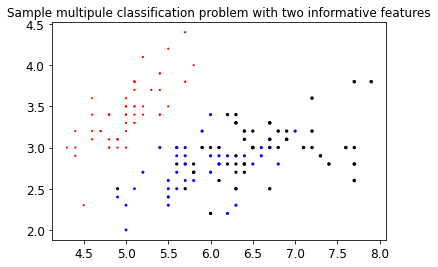

In [1281]:
# synthetic dataset for classification (binary)

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#000000'])

plt.figure()
plt.title('Sample multipule classification problem with two informative features')

plt.scatter(X[:, 0], X[:, 1], X[:, 2], marker= 'o', c=y,  cmap=cmap_bold)
plt.show()

In [1282]:
y_test.shape

(38,)

In [1283]:
# Print classification report
target_names = ['Class 0', 'Class 1','Class2']

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier
print(result_metrics)

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        13
     Class 1       1.00      1.00      1.00        16
      Class2       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [1284]:
from sklearn.metrics import roc_curve, auc
y_score = nbclf.predict_proba(X_test)

In [1285]:
X_normal = normal_df.iloc[:, :4].to_numpy() 

y_normal = df['Class'].to_numpy() 

from sklearn.model_selection import train_test_split  

from sklearn.naive_bayes import GaussianNB 

from adspy_shared_utilities import plot_class_regions_for_classifier 

  
X_trainN, X_testN, y_trainN, y_testN = train_test_split(X_normal, y_normal, random_state=0)  

nbclf_N = GaussianNB().fit(X_trainN, y_trainN) 


In [1286]:
print(nbclf_N.score(X_testN, y_testN))

1.0


In [1287]:
y_predN = nbclf_N.predict(X_testN)

# plot a confusion matrix
confusion_mat_N = confusion_matrix(y_testN, y_predN)

print(confusion_mat_N)

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


In [1288]:
# Print classification report
target_names= ['Class 0', 'Class 1','Class2']

result_metrics_N = classification_report(y_testN, y_predN, target_names=target_names)

print(result_metrics_N)

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        13
     Class 1       1.00      1.00      1.00        16
      Class2       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



### K-Fold 

### Stocastic Gradient Descent (SGD) classifier

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html 

In [1289]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [1290]:
cross_val_score(sgd_clf, X_train, y_train, cv=10, scoring="accuracy")

array([1.        , 0.83333333, 0.72727273, 0.90909091, 0.81818182,
       0.72727273, 0.81818182, 1.        , 1.        , 0.81818182])

In [1291]:
from sklearn.model_selection import KFold # import k-fold validation

kf = KFold(n_splits=10, random_state=None, shuffle=True) # Define the split - into k folds 

kf

KFold(n_splits=10, random_state=None, shuffle=True)

In [1292]:
y_b= df['Class']

In [1293]:
nbclf = GaussianNB()

In [1294]:
target_names = ['Class_0', 'Class_1', 'Class_2']

c0_precisions = []
c0_recalls = []
c1_precisions = []
c1_recalls = []
c2_precisions = []
c2_recalls = []
for train_index, test_index in kf.split(X):
    
    X_train, y_train = X[train_index], y_b[train_index]
    X_test, y_test = X[test_index], y_b[test_index]

    nbclf.fit(X_train, y_train)  # sgd_clf
    y_pred = nbclf.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred))
    
    # Get a dictionary of performance results and access the results
    results = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    metrics_dict = classification_report(y_test, y_pred, 
                        target_names=target_names, output_dict=True)
    
    # example
    c0_precisions.append(results['Class_0']['precision'])
    c0_recalls.append(results['Class_0']['recall'])
    c1_precisions.append(results['Class_1']['precision'])
    c1_recalls.append(results['Class_1']['recall'])
    c2_precisions.append(results['Class_2']['precision'])
    c2_recalls.append(results['Class_2']['recall'])
    
    print('precision (weighted):', metrics_dict['weighted avg']['precision'])
    print('recall avg (weighted):', metrics_dict['weighted avg']['recall'])
    print('accuracy: ', metrics_dict['accuracy'])

print()
print('Average Class_0: precision', sum(c0_precisions)/10)
print('Average Class_0: recall', sum(c0_recalls)/10)

print('Average Class_1: precision', sum(c1_precisions)/10)
print('Average Class_1: recall', sum(c1_recalls)/10)

print('Average Class_2: precision', sum(c2_precisions)/10)
print('Average Class_2: recall', sum(c2_recalls)/10)

[[6 0 0]
 [0 6 0]
 [0 0 3]]
precision (weighted): 1.0
recall avg (weighted): 1.0
accuracy:  1.0
[[4 0 0]
 [0 3 0]
 [0 0 8]]
precision (weighted): 1.0
recall avg (weighted): 1.0
accuracy:  1.0
[[9 0 0]
 [0 4 0]
 [0 0 2]]
precision (weighted): 1.0
recall avg (weighted): 1.0
accuracy:  1.0
[[4 0 0]
 [0 6 0]
 [0 1 4]]
precision (weighted): 0.9428571428571428
recall avg (weighted): 0.9333333333333333
accuracy:  0.9333333333333333
[[6 0 0]
 [0 4 0]
 [0 0 5]]
precision (weighted): 1.0
recall avg (weighted): 1.0
accuracy:  1.0
[[6 0 0]
 [0 4 2]
 [0 0 3]]
precision (weighted): 0.92
recall avg (weighted): 0.8666666666666667
accuracy:  0.8666666666666667
[[5 0 0]
 [0 4 0]
 [0 1 5]]
precision (weighted): 0.9466666666666667
recall avg (weighted): 0.9333333333333333
accuracy:  0.9333333333333333
[[3 0 0]
 [0 6 0]
 [0 0 6]]
precision (weighted): 1.0
recall avg (weighted): 1.0
accuracy:  1.0
[[5 0 0]
 [0 5 0]
 [0 0 5]]
precision (weighted): 1.0
recall avg (weighted): 1.0
accuracy:  1.0
[[2 0 0]
 [0 5 

### ROC Cure

accuracy:  1.0


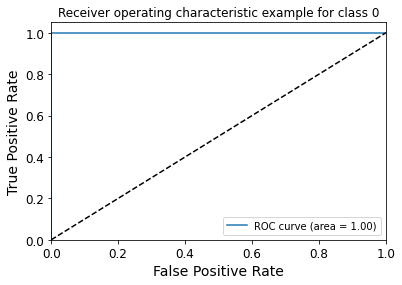

accuracy:  0.9814814814814814


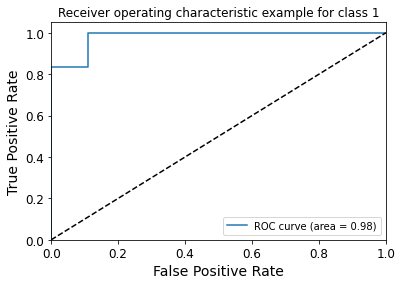

accuracy:  0.9821428571428571


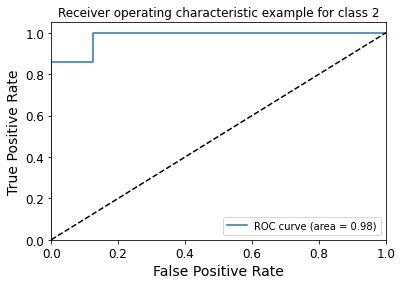

In [1295]:
from sklearn.metrics import roc_auc_score, auc

y_score = nbclf.predict_proba(X_test)
    
y_test = label_binarize(y_test, classes=[0,1,2])
n_classes = 3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    print("accuracy: " , roc_auc[i])
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example for class ' + str(i) )
    plt.legend(loc="lower right")
    plt.show()

###  ROC

In [1296]:
X_test.shape

(15, 4)

In [1297]:
from sklearn.metrics import roc_auc_score, auc

y_score = nbclf.predict_proba(X_test)

print(y_score.shape)
zero = y_score[0].mean()
one = y_score[1].mean()
print(zero, one)


(15, 3)
0.3333333333333333 0.3333333333333333


In [1298]:
print(y_score[:,1])

[1.19457748e-17 1.81359468e-14 4.54224728e-01 9.99850187e-01
 9.98552278e-01 9.99407793e-01 9.99977533e-01 9.99905655e-01
 4.09695348e-07 3.46860964e-03 9.93284557e-01 2.92228671e-03
 4.00476415e-02 1.85966640e-06 1.01767868e-01]


In [1299]:
print(y_pred)

[0 0 2 1 1 1 1 1 2 2 1 2 2 2 2]


### ROC-AUC score is meant for classification problems where the output is the probability of the input belonging to a class. If you do a multi-class classification, then you can compute the score for each class independently.

Moreover, the predict method returns a discrete class, not a probability. Let's imagine you do a binary classification and have only one example, it should be classified as False. If your classifier yields a probability of 0.7, the ROC-AUC value is 1.0-0.7=0.3. If you use the predict method, the ROC-AUC value will be 1.0-1.0=0.0, which won't tell you much. 

In [1300]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver="liblinear").fit(X, y)
roc_auc = roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')
print('Accuracy = ', roc_auc)

Accuracy =  0.9914


In [1301]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold


In [1302]:
col = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

In [1303]:
X= df[col]

In [1304]:
y=df['Class']

In [1305]:
test = df.loc[df['Class'] ==1]
print(test.shape)

(50, 6)


In [1306]:
df = df.assign(zero = lambda y: y['Class']==0)
df = df.assign(one = lambda y: y['Class']==1)
df = df.assign(two = lambda y: y['Class']==2)

In [1307]:
dfBK.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Class,zero,one,two
0,5.1,3.5,1.4,0.2,Iris-setosa,0,True,False,False
1,4.9,3.0,1.4,0.2,Iris-setosa,0,True,False,False
2,4.7,3.2,1.3,0.2,Iris-setosa,0,True,False,False
3,4.6,3.1,1.5,0.2,Iris-setosa,0,True,False,False
4,5.0,3.6,1.4,0.2,Iris-setosa,0,True,False,False


In [1308]:
test1 = df.loc[df['one'] ==True]
print(test1.shape)

(50, 9)


In [1309]:
df['zero'] = df['zero'].map({True: 0, False: 1})
df['one'] = df['one'].map({True: 0, False: 1})
df['two'] = df['two'].map({True: 0, False: 1})

In [1310]:
df.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Class,zero,one,two
145,6.7,3.0,5.2,2.3,Iris-virginica,2,1,1,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2,1,1,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2,1,1,0
148,6.2,3.4,5.4,2.3,Iris-virginica,2,1,1,0
149,5.9,3.0,5.1,1.8,Iris-virginica,2,1,1,0


In [1311]:
y_Roc = {0:df['zero'],1:df['one'],2: df['two']}

In [1312]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train= dict()
X_test = dict()
y_train=dict()
y_test = dict()
y_pred = dict()
nbclf = dict()
score = dict()
confusion_mat= dict()
n_class = 3

for i in range(n_class):
    X_train[i], X_test[i], y_train[i], y_test[i] = train_test_split(X, y_Roc[i], random_state=0)
    nbclf[i] = GaussianNB().fit(X_train[i], y_train[i])
    score[i] = nbclf[i].score(X_test[i], y_test[i])
    y_pred[i] = nbclf[i].predict(X_test[i])
    # plot a confusion matrix
    confusion_mat[i] = confusion_matrix(y_test[i], y_pred[i])
    print("The class_%i score is : %0.4f"%(i,score[i]))
    print(confusion_mat[i])
    

The class_0 score is : 1.0000
[[13  0]
 [ 0 25]]
The class_1 score is : 1.0000
[[16  0]
 [ 0 22]]
The class_2 score is : 0.8947
[[ 9  0]
 [ 4 25]]


Accuracy Zero =  1.0
Accuracy Zero =  1.0
Accuracy Zero =  0.9885057471264367


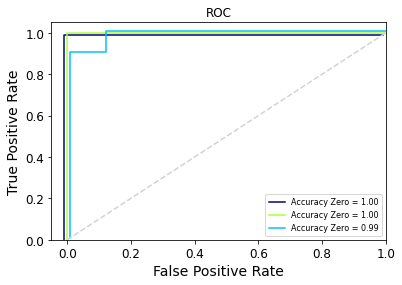

In [1313]:
from sklearn.metrics import roc_curve, auc

y_score = dict()
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
color = []

# Get different color each graph line
colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
            'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
            'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
            'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']

# Plotting
plt.title('ROC')

for i in range(n_class):
    y_score[i] = nbclf[i].predict_proba(X_test[i])
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_test[i], y_score[i][:,1])
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])    
    plt.plot(false_positive_rate[i]-0.01*(1-i), true_positive_rate[i]-0.01*(1-i), c=colorSet[i], label=('Accuracy Zero = %0.2f'%roc_auc[i]))
    print('Accuracy Zero = ', roc_auc[i])


plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### Compare NB and KNN(K=10) using normalized data 

In [1314]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

In [1315]:
X = normal_df.iloc[:, : 4].to_numpy() 
y = df['Class'].to_numpy() 
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, random_state=0)

In [1316]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

nbclfNormalized = GaussianNB().fit(X_train4, y_train4)

score = cross_val_score(nbclfNormalized, X_train4, y_train4, cv=10, scoring="accuracy")
print(score)
print(score.sum()/10)


[1.         0.83333333 0.81818182 0.90909091 1.         1.
 1.         0.90909091 1.         0.90909091]
0.9378787878787878


In [1317]:
nbclfNormalized.score(X_test4, y_test4)

1.0

In [1318]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knnNormalized = KNeighborsClassifier(n_neighbors = 15).fit(X_train4, y_train4)

score = cross_val_score(knnNormalized, X_train4, y_train4, cv=10, scoring="accuracy")
print(score)
print(score.sum()/10)

[1.         0.83333333 0.81818182 1.         1.         1.
 1.         0.81818182 1.         0.90909091]
0.9378787878787879


In [1319]:
knnNormalized.score(X_test4, y_test4)

0.9736842105263158

### Find best k-value for  KNN 

In [1320]:
# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [1323]:
k_value = [1, 5, 10, 15, 20]

KNN_train_score = dict()
KNN_test_score = dict()

for k in k_value:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    KNN_train_score[k] = knn.score(X_train, y_train)
    KNN_test_score[k] = knn.score(X_test, y_test)
    print(f"k={k}")
    print("training score: ", knn.score(X_train, y_train))
    print("testing score: ", knn.score(X_test, y_test))
    
    # plot a confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    print(confusion_mat)
    
    # Print classification report
    target_names = ['class_0', 'class_1', 'class_2']
   
    #classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    result_metrics = classification_report(y_test, y_pred, target_names=target_names)
    print(result_metrics)

print(KNN_train_score)
print(KNN_test_score)

k=1
training score:  1.0
testing score:  0.9
[[12  0  0]
 [ 0  7  1]
 [ 0  2  8]]
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.78      0.88      0.82         8
     class_2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.89      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30

k=5
training score:  0.975
testing score:  0.8666666666666667
[[12  0  0]
 [ 0  7  1]
 [ 0  3  7]]
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.70      0.88      0.78         8
     class_2       0.88      0.70      0.78        10

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.85        30
weighted avg       0.88      0.87      0.87        30

k=10
training score:  0.975
testing score:  0.93333333333

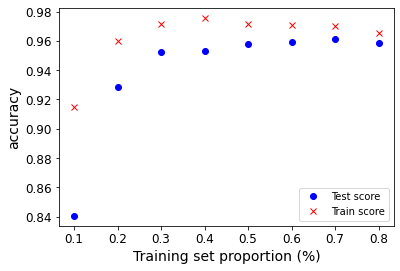

In [1334]:
t = [x/10 for x in range(1, 9)]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    train_score = []
    test_score = []
    for i in range(1,100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        train_score.append(knn.score(X_train, y_train))
        test_score.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(test_score), 'bo')
    plt.plot(s, np.mean(train_score), 'rx')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');
plt.legend(['Test score','Train score']) 
plt.show()